In [1]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt


In [2]:
# Load Dataset
df = pd.read_csv('MaterialStrength.csv')

# Menampilkan 5 baris teratas
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


In [4]:
# Mengubah target_feature menjadi kategori berdasarkan threshold
# Misalnya, kita anggap nilai di atas median sebagai 1 (positif) dan sisanya 0 (negatif)
threshold = df['target_feature'].median()
df['target_feature'] = (df['target_feature'] > threshold).astype(int)

# Mengonversi kolom object menjadi numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()
for col in ['x14', 'x15']:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [5]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['target_feature'])
y = df['target_feature']

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisasi fitur untuk SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Melatih model SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Memprediksi data uji
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model:")
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("\nClassification Report:")
print(classification_rep)


Hasil Evaluasi Model:
Akurasi: 0.8641
Presisi: 0.8947
Recall: 0.8252
F1-Score: 0.8586
AUC: 0.9267

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       103
           1       0.89      0.83      0.86       103

    accuracy                           0.86       206
   macro avg       0.87      0.86      0.86       206
weighted avg       0.87      0.86      0.86       206



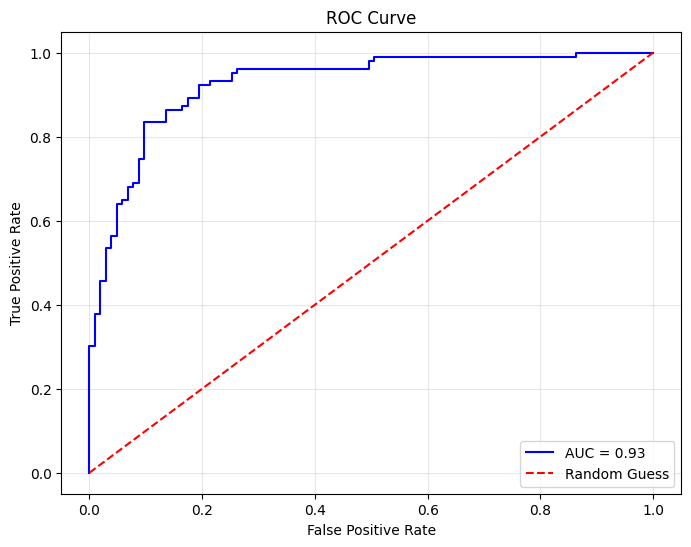

In [7]:
# Membuat ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()